In [9]:
import io
import os
from datetime import datetime
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from difflib import Differ
from processing import load_results, generate_summary_stats
from processing import plot_cer, plot_cer_confidence_interval, plot_fuzzy_match, plot_close_matches

# Load predictions

In [10]:
filenames = list(Path('predictions/bayes_tuner_1-transfer_learned').glob('*.csv'))
models, results = load_results(filenames)
summary_results = generate_summary_stats(models, results)
print([a[1] for a in models])
results.head()

['bayes_best_8_19-combo-fine_tuned-predictions', 'bayes_best_8_19-combo-retrained-predictions', 'bayes_best_8_19-standley-fine_tuned-predictions', 'bayes_best_8_19-standley-retrained-predictions', 'bayes_best_8_19-steyermark-fine_tuned-predictions', 'bayes_best_8_19-steyermark-retrained-predictions']


,bayes_best_8_19-steyermark-fine_tuned-predictions-ground_truth,bayes_best_8_19-steyermark-fine_tuned-predictions,bayes_best_8_19-steyermark-retrained-predictions-ground_truth,bayes_best_8_19-steyermark-retrained-predictions,bayes_best_8_19-standley-fine_tuned-predictions-ground_truth,bayes_best_8_19-standley-fine_tuned-predictions,bayes_best_8_19-combo-fine_tuned-predictions-ground_truth,bayes_best_8_19-combo-fine_tuned-predictions,bayes_best_8_19-standley-retrained-predictions-ground_truth,bayes_best_8_19-standley-retrained-predictions,...,bayes_best_8_19-steyermark-fine_tuned-predictions match ratio insensitive,bayes_best_8_19-steyermark-fine_tuned-predictions CER no punc,bayes_best_8_19-steyermark-fine_tuned-predictions match ratio no punc,bayes_best_8_19-steyermark-retrained-predictions CER,bayes_best_8_19-steyermark-retrained-predictions match ratio,bayes_best_8_19-steyermark-retrained-predictions-edit_distance,bayes_best_8_19-steyermark-retrained-predictions CER insensitive,bayes_best_8_19-steyermark-retrained-predictions match ratio insensitive,bayes_best_8_19-steyermark-retrained-predictions CER no punc,bayes_best_8_19-steyermark-retrained-predictions match ratio no punc
0,Polk Co.,Aeris,Polk Co.,Aotirn,.),.),.),.),.),b,...,0.0,100.000000,0.0,85.714286,14.0,7.0,85.714286,14.0,85.714286,14.0
1,July,Joter,July,wates,Maxon,am,Maxon,iar,Maxon,mormn,...,22.0,100.000000,22.0,125.000000,0.0,5.0,125.000000,0.0,125.000000,0.0
2,1937,nis,1937,basg,delitescens,Cirons,delitescens,celcicansa,delitescens,Poctone,...,0.0,92.857143,0.0,95.238095,0.0,4.0,95.238095,0.0,95.238095,0.0
3,.),1,.),thr,radicans,idinn,radicans,lidoan,radicans,licteme,...,0.0,NaN,NaN,300.000000,0.0,3.0,300.000000,0.0,NaN,NaN
4,on,in,on,io,Damp,Mw,Damp,in,Damp,bom,...,50.0,50.000000,50.0,100.000000,50.0,2.0,100.000000,50.0,100.000000,50.0


# View summary stats

In [11]:
summary_results[[('CER', 'mean'), ('CER_insensitive', 'mean'), ('CER_nopunc', 'mean'), 
                       ('matchratio', 'mean'), ('matchratio_insensitive', 'mean'), ('matchratio_nopunc', 'mean')]]

stat,CER,CER_insensitive,CER_nopunc,matchratio,matchratio_insensitive,matchratio_nopunc
substats,mean,mean,mean,mean,mean,mean
bayes_best_8_19-combo-fine_tuned-predictions,82.564744,82.564744,81.17101,26.459239,27.647645,28.032772
bayes_best_8_19-combo-retrained-predictions,94.556694,94.556694,93.526269,17.034568,18.120988,19.90407
bayes_best_8_19-standley-fine_tuned-predictions,85.057448,85.057448,84.02813,26.069136,26.841975,26.615385
bayes_best_8_19-standley-retrained-predictions,99.412053,99.412053,98.375016,20.185185,21.597531,22.197403
bayes_best_8_19-steyermark-fine_tuned-predictions,84.855607,84.855607,84.006278,25.663805,26.476395,26.647399
bayes_best_8_19-steyermark-retrained-predictions,97.140453,97.140453,96.097199,17.135908,18.562232,19.119822


In [12]:
summary_results[['exact_matches', 'oboe_matches', 'cer_95_error_min', 'cer_95_error_max']]

stat,exact_matches,oboe_matches,cer_95_error_min,cer_95_error_max
substats,,,,
bayes_best_8_19-combo-fine_tuned-predictions,11.0,50.0,80.123480,85.006008
bayes_best_8_19-combo-retrained-predictions,0.0,3.0,91.375667,97.737721
bayes_best_8_19-standley-fine_tuned-predictions,2.0,14.0,81.580643,88.534254
bayes_best_8_19-standley-retrained-predictions,0.0,2.0,95.446692,103.377414
bayes_best_8_19-steyermark-fine_tuned-predictions,6.0,37.0,81.723391,87.987823
bayes_best_8_19-steyermark-retrained-predictions,0.0,7.0,94.626347,99.654559


# Display graphs

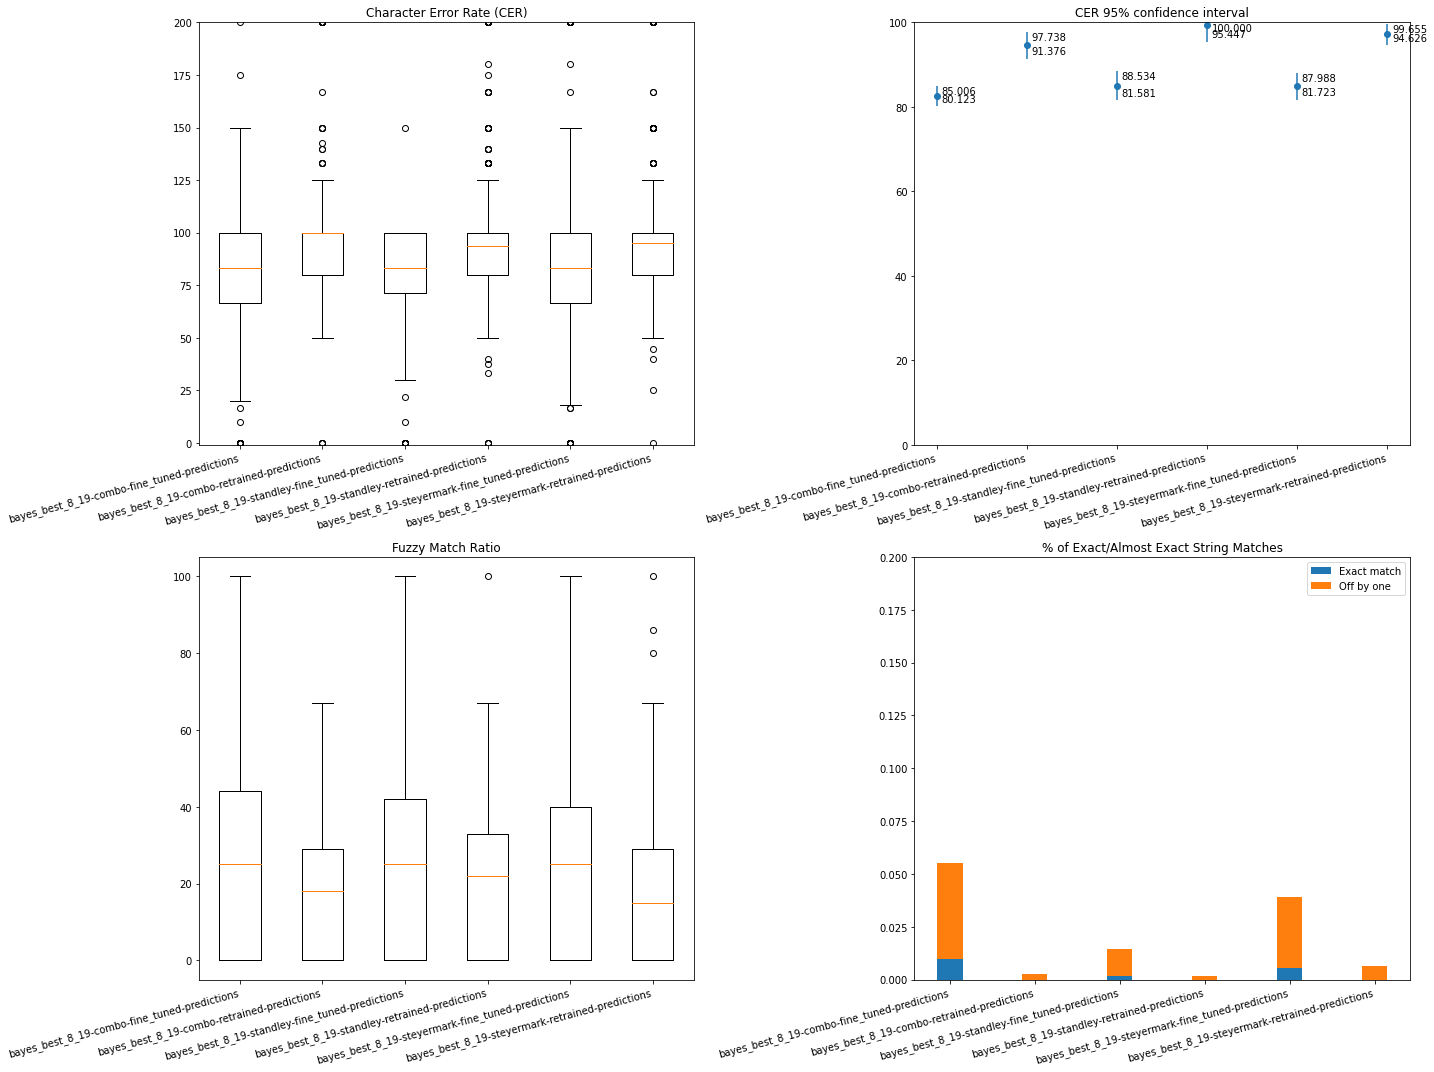

In [20]:
fig, ((graph1, graph2), (graph3, graph4)) = plt.subplots(2, 2, figsize=(20, 15))
# fig, graph1 = plt.subplots(1, 1, figsize=(10, 7))  # For saving individual charts

plot_cer(models, results, graph1)
plot_cer_confidence_interval(models, summary_results, graph2)
plot_fuzzy_match(models, results, graph3)
plot_close_matches(models, results, summary_results, graph4)
fig.tight_layout()

# OBO String Comparisons

In [8]:
!pip install Bio
from Bio import pairwise2
from Bio.Seq import Seq
seq1 = Seq('foot')
seq2 = Seq('moot')
a = pairwise2.align.globalxx(seq1, seq2)
print(pairwise2.format_alignment(*a[0]))
a[0].end

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 4.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.7 MB/s eta 0:00:0000:0100:01
f-oot
  |||
-moot
  Score=3



5

In [20]:
d = Differ()
substitution_errors = list()
deletion_errors = [dict()]
CHAR_LIST = '\' !"#&()[]*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
deletion_errors[0] = {c:0 for c in list(CHAR_LIST)}
insertion_errors = deletion_errors * 2 # len(models)
deletion_errors = deletion_errors * 2 # len(models)
    
for idx, (ground_truth_label, model_label) in enumerate(models[:2]):
    oboe = results[results[f'{model_label}-edit_distance'] == 1][[ground_truth_label, model_label]]
    subs = dict()
    dels = deletion_errors[idx]
    ins = deletion_errors[idx]
    # print(oboe)
    for idx, row in oboe.iterrows():
        differ_result = list(d.compare(row[ground_truth_label], row[model_label]))
        removed = [c[2] for c in differ_result if c[0] == '-']
        added = [c[2] for c in differ_result if c[0] == '+']
        assert len(removed) < 2 and len(added) < 2, f'Lens are wrong, -: {removed}, +: {added}'
        if len(row[ground_truth_label]) == len(row[model_label]):
            sub_chars = (removed[0], added[0])
            # print(f'sub: {sub_chars}')
            if sub_chars in subs.keys():
                subs[sub_chars] += 1
            else:
                subs[sub_chars] = 1
        elif len(row[ground_truth_label]) > len(row[model_label]):
            del_char = removed[0]
            # print(f'del: {del_char}')
            dels[del_char] += 1
        else:
            ins_char = added[0]
            # print(f'ins: {ins_char}')
            ins[ins_char] += 1
    substitution_errors.append(subs)
    deletion_errors.append(dels)
    insertion_errors.append(ins)
substitution_errors = [dict(sorted(a.items(), key=lambda item: item[1], reverse=True)) for a in substitution_errors]
# deletion_errors = [dict(sorted(a.items(), key=lambda item: item[1], reverse=True)) for a in deletion_errors]
# insertion_errors = [dict(sorted(a.items(), key=lambda item: item[1], reverse=True)) for a in insertion_errors]

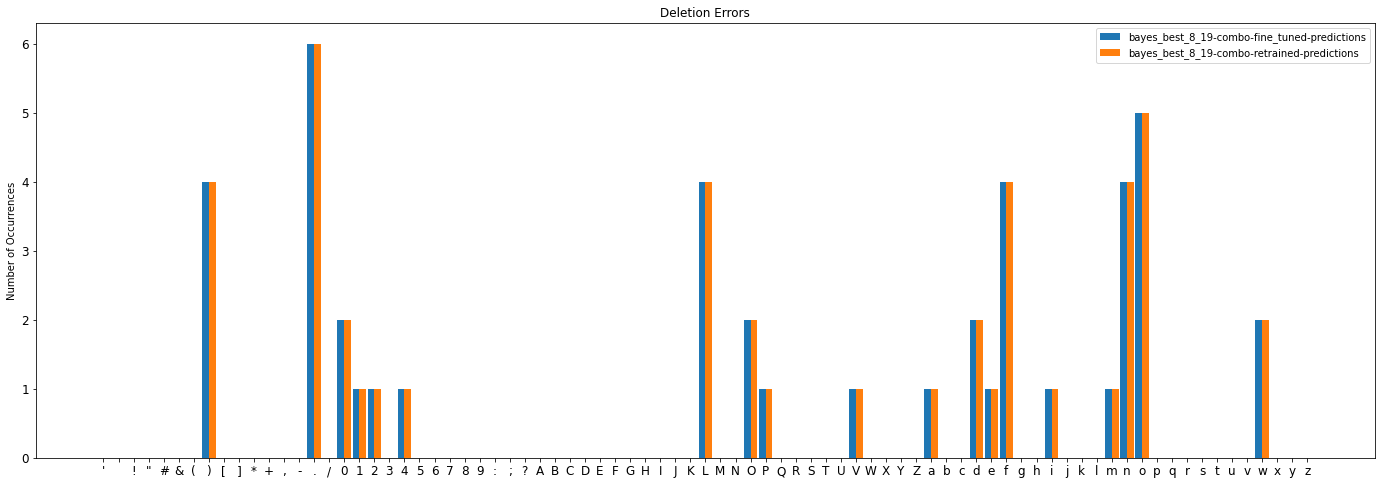

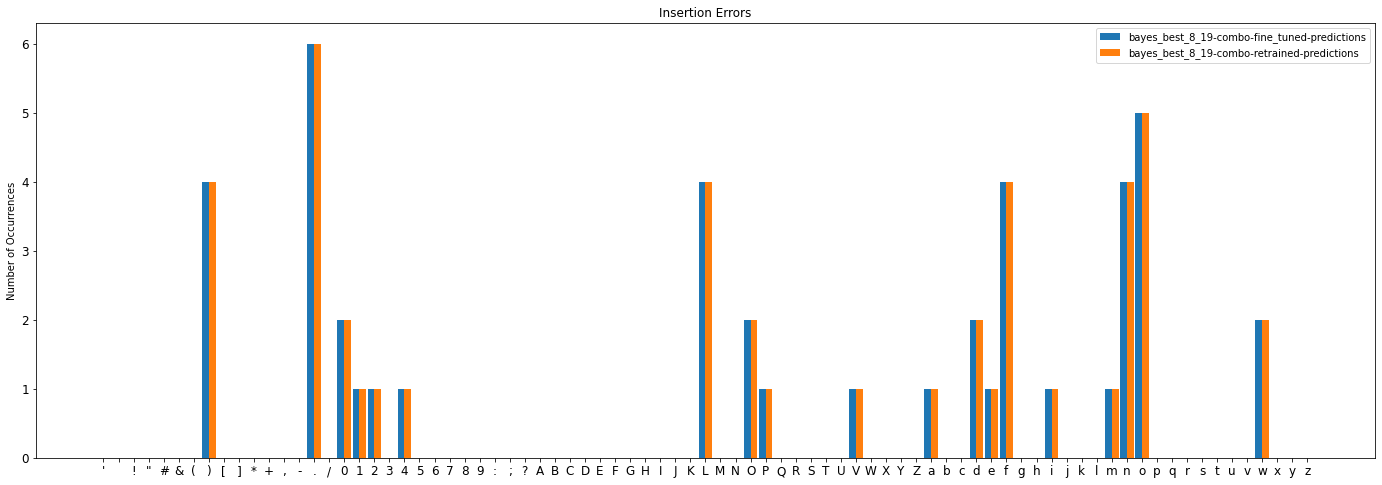

In [21]:
# print('Top Substitutions:')
# for key in list(substitution_errors[0])[:10]:
#     print(f'{key}: {substitution_errors[0][key]}')
# print('\nTop Deletions:')
# for key in list(deletion_errors[0])[:10]:
#     print(f'{key}: {deletion_errors[0][key]}')
# print('\nTop Insertions:')
# for key in list(insertion_errors[0])[:10]:
#     print(f'{key}: {insertion_errors[0][key]}')

plt.figure(figsize=(24,8))
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.bar(np.arange(len(deletion_errors[0].keys())) - 0.225, deletion_errors[0].values(), 0.45, label = models[0][1])
plt.bar(np.arange(len(deletion_errors[0].keys())) + 0.225, deletion_errors[1].values(), 0.45, label = models[1][1])
plt.xticks(np.arange(len(deletion_errors[0].keys())) , deletion_errors[0].keys())
plt.title("Deletion Errors")
plt.ylabel("Number of Occurrences")
plt.legend()
plt.show()

plt.figure(figsize=(24,8))
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.bar(np.arange(len(insertion_errors[0].keys())) - 0.225, insertion_errors[0].values(), 0.45, label = models[0][1])
plt.bar(np.arange(len(insertion_errors[0].keys())) + 0.225, insertion_errors[1].values(), 0.45, label = models[1][1])
plt.xticks(np.arange(len(insertion_errors[0].keys())) , insertion_errors[0].keys())
plt.title("Insertion Errors")
plt.ylabel("Number of Occurrences")
plt.legend()
plt.show()

In [37]:
list_of_changes = []
for idx, (ground_truth_label, model_label) in enumerate(models):
    oboes = results[results[f'{model_label}-edit_distance']==1][[f'{model_label}-ground_truth', model_label]]
    diffs = oboes.apply(lambda r: list(d.compare(r[f'{model_label}-ground_truth'], r[model_label])), axis=1)
    diffs = diffs.apply(lambda r: [a for a in r if a[0] == '+' or a[0] == '-'])
    list_of_changes.append(diffs)
print(f'Top 10 changes in {models[0][1]}: {list(list_of_changes[0][0:10])}')
print(f'Top 10 changes in {models[1][1]}: {list(list_of_changes[1][0:10])}')
missing = list()
added = list()
for changes in list_of_changes:
    missing_this_model = dict()
    added_this_model = dict()
    for change_list in changes:
        for change in change_list:
            if change[0] == '+':
                added_value = change[2:]
                if added_value in added_this_model.keys():
                    added_this_model[added_value] += 1
                else:
                    added_this_model[added_value] = 1
            elif change[0] == '-':
                missing_value = change[2:]
                if missing_value in missing_this_model.keys():
                    missing_this_model[missing_value] += 1
                else:
                    missing_this_model[missing_value] = 1
    missing_this_model = {k: v for k, v in sorted(missing_this_model.items(), key=lambda i: i[1], reverse=True)}
    missing.append(missing_this_model)
    added_this_model = {k: v for k, v in sorted(added_this_model.items(), key=lambda i: i[1], reverse=True)}
    added.append(added_this_model)
print(f'Top missing in {models[0][1]}: {missing[0]}')
print(f'Top missing in {models[1][1]}: {missing[1]}')
print(f'Top added in {models[0][1]}: {added[0]}')
print(f'Top added in {models[1][1]}: {added[1]}')
# char_sub_summary = pd.DataFrame(columns=['Missing])

Top 10 changes in bayes_best_8_19-combo-fine_tuned-predictions: [['- w', '+ n'], ['- V', '+ N'], ['- )'], ['- o'], ['- f', '+ p'], ['- 8', '+ 3'], ['- 4'], ['- 5', '+ 2'], ['- f', '+ p'], ['- T', '+ 1']]
Top 10 changes in bayes_best_8_19-combo-retrained-predictions: [['- )'], ['- V'], ['- L', '+ .'], ['- n', '+ .'], ['- )'], ['- n', '+ ,'], ['- 2', '+ "'], ['- t', '+ .'], ['- v', '+ .'], ['- M', '+ i']]
Top missing in bayes_best_8_19-combo-fine_tuned-predictions: {'o': 9, 'f': 8, '.': 8, 'n': 8, '6': 7, 'w': 5, '2': 5, '3': 4, 'L': 4, '4': 3, '0': 3, 'O': 3, 'M': 3, 'P': 3, ')': 2, '8': 2, '1': 2, 'E': 2, 'B': 2, 't': 2, 'd': 2, 'V': 1, '5': 1, 'T': 1, 'R': 1, '7': 1, 'm': 1, 'W': 1, 'N': 1, '9': 1, 'g': 1, 'U': 1, 'S': 1, 'C': 1, 'H': 1, 'l': 1, 'c': 1}
Top missing in bayes_best_8_19-combo-retrained-predictions: {'L': 5, 'M': 3, ')': 2, 'V': 2, 'n': 2, 'P': 2, '2': 1, 't': 1, 'v': 1, 'f': 1, 'w': 1}
Top added in bayes_best_8_19-combo-fine_tuned-predictions: {'1': 13, '2': 11, 'L': 7, 

# Save these results to the filesystem

In [ ]:
results_folder = 'results'
if not os.path.exists(results_folder):
    os.makedirs(results_folder)
timestamp = datetime.now().strftime('%Y_%m_%d-%H_%M_%S')
summary_results.to_csv(Path(results_folder, f'summary-{timestamp}.csv'))
fig.savefig(Path(results_folder, f'summary-{timestamp}.png'))